<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

zsh:1: command not found: wget


Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


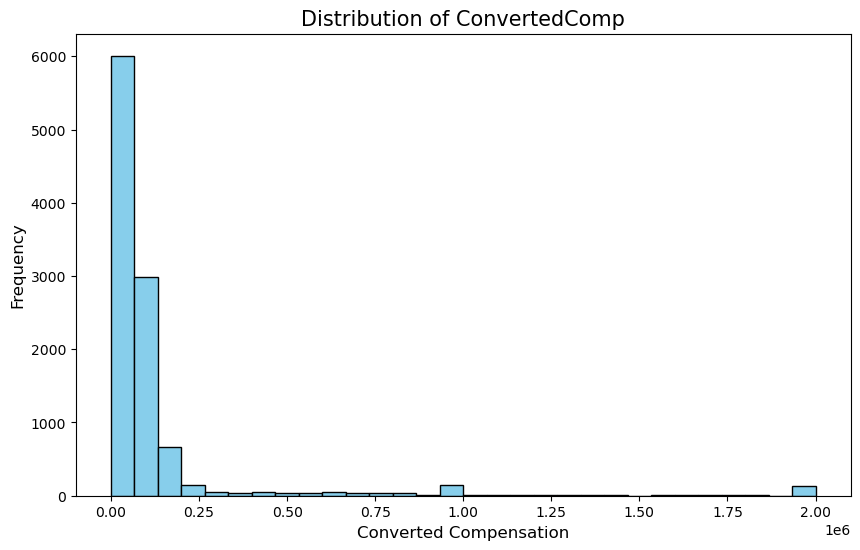

In [9]:
# your code goes here
# Importing necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")
# Loading the data for 'ConvertedComp' column
df = pd.read_sql_query("SELECT ConvertedComp FROM master", conn)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of ConvertedComp', fontsize=15)
plt.xlabel('Converted Compensation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()



### Box Plots


Plot a box plot of `Age.`


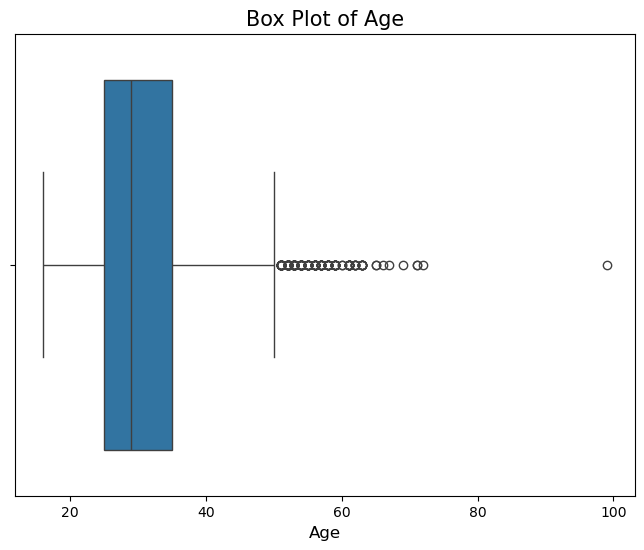

In [10]:
# your code goes here
# Loading the data for 'Age' column
df_age = pd.read_sql_query("SELECT Age FROM master", conn)

# Plotting the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_age['Age'])
plt.title('Box Plot of Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.show()



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


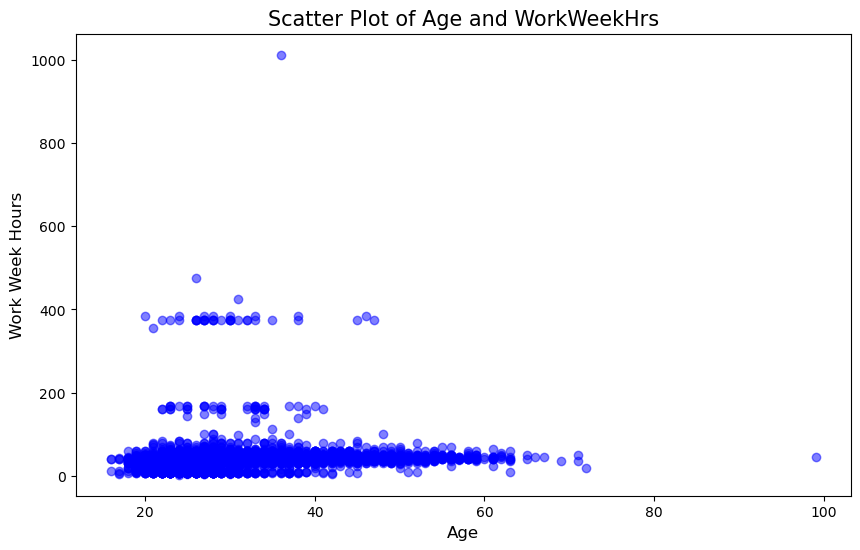

In [11]:
# your code goes here
# Loading the data for 'Age' and 'WorkWeekHrs'
df_scatter = pd.read_sql_query("SELECT Age, WorkWeekHrs FROM master WHERE Age IS NOT NULL AND WorkWeekHrs IS NOT NULL", conn)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['Age'], df_scatter['WorkWeekHrs'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Age and WorkWeekHrs', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Work Week Hours', fontsize=12)
plt.show()




### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


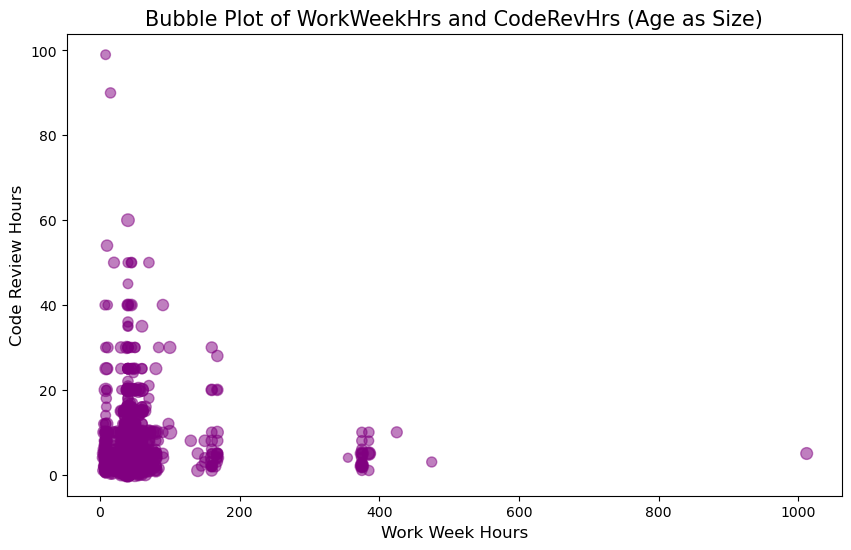

In [12]:
# your code goes here
# Loading the data for 'WorkWeekHrs', 'CodeRevHrs', and 'Age'
df_bubble = pd.read_sql_query("SELECT Age, WorkWeekHrs, CodeRevHrs FROM master WHERE Age IS NOT NULL AND WorkWeekHrs IS NOT NULL AND CodeRevHrs IS NOT NULL", conn)

# Plotting the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(df_bubble['WorkWeekHrs'], df_bubble['CodeRevHrs'], s=df_bubble['Age']*2, alpha=0.5, color='purple')
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs (Age as Size)', fontsize=15)
plt.xlabel('Work Week Hours', fontsize=12)
plt.ylabel('Code Review Hours', fontsize=12)
plt.show()




## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


  DatabaseDesireNextYear  Count
0             PostgreSQL   4328
1                MongoDB   3649
2                  Redis   3331
3                  MySQL   3281
4          Elasticsearch   2856


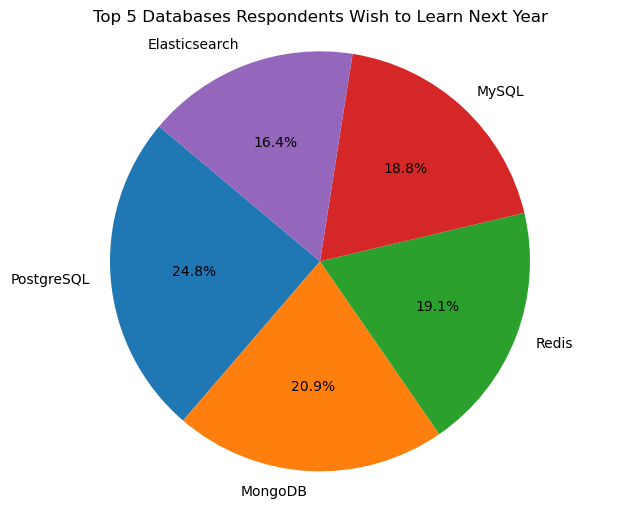

In [47]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Reopen the connection
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to get the databases respondents wish to learn next year from the DatabaseDesireNextYear table
query = """
SELECT DatabaseDesireNextYear, COUNT(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""

# Execute the query and fetch the result
df_desire_next_year = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Check the DataFrame
print(df_desire_next_year)

# Create a pie chart if there are results
if not df_desire_next_year.empty:
    plt.figure(figsize=(8, 6))
    plt.pie(df_desire_next_year['Count'], labels=df_desire_next_year['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=140)
    plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
    
    # Show the plot
    plt.show()
else:
    print("No data available for the specified query.")






### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


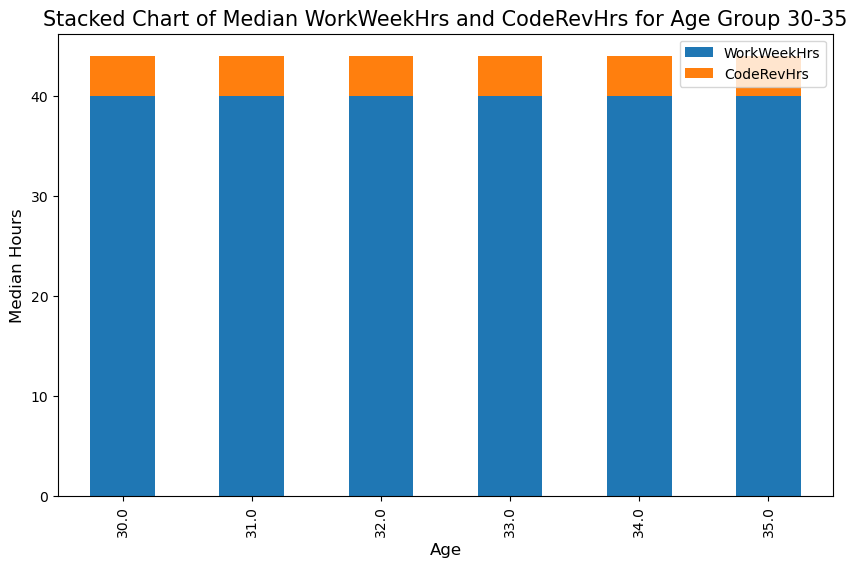

In [14]:
# your code goes here
# Loading the data for the age group 30 to 35
df_stacked = pd.read_sql_query("SELECT Age, WorkWeekHrs, CodeRevHrs FROM master WHERE Age BETWEEN 30 AND 35", conn)

# Calculating median WorkWeekHrs and CodeRevHrs
df_stacked_median = df_stacked.groupby('Age').median()

# Plotting the stacked bar chart
df_stacked_median.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs for Age Group 30-35', fontsize=15)
plt.ylabel('Median Hours', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


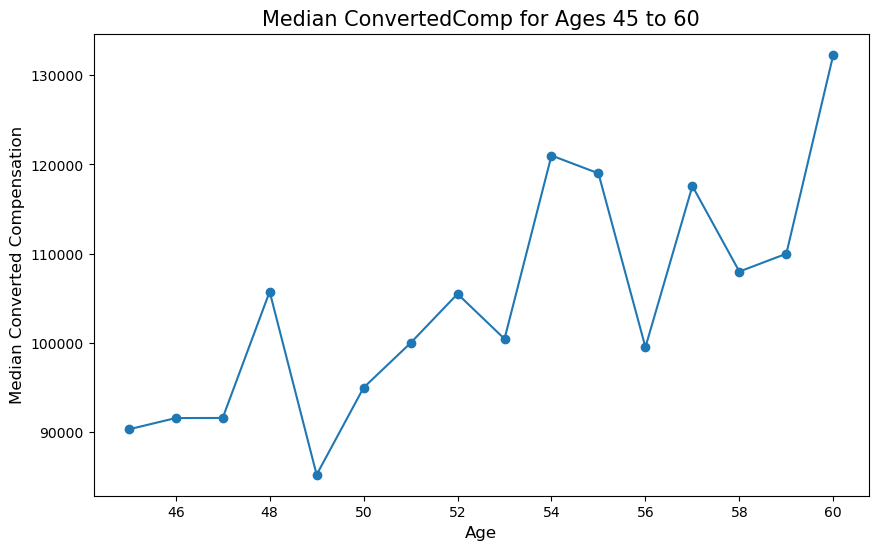

In [15]:
# your code goes here
# Loading the data for the age group 45 to 60
df_median_comp = pd.read_sql_query("SELECT Age, ConvertedComp FROM master WHERE Age BETWEEN 45 AND 60", conn)

# Calculating median ConvertedComp
df_median_comp = df_median_comp.groupby('Age')['ConvertedComp'].median()

# Plotting the line chart
plt.figure(figsize=(10, 6))
df_median_comp.plot(kind='line', marker='o')
plt.title('Median ConvertedComp for Ages 45 to 60', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Median Converted Compensation', fontsize=12)
plt.show()




### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<Figure size 1000x600 with 0 Axes>

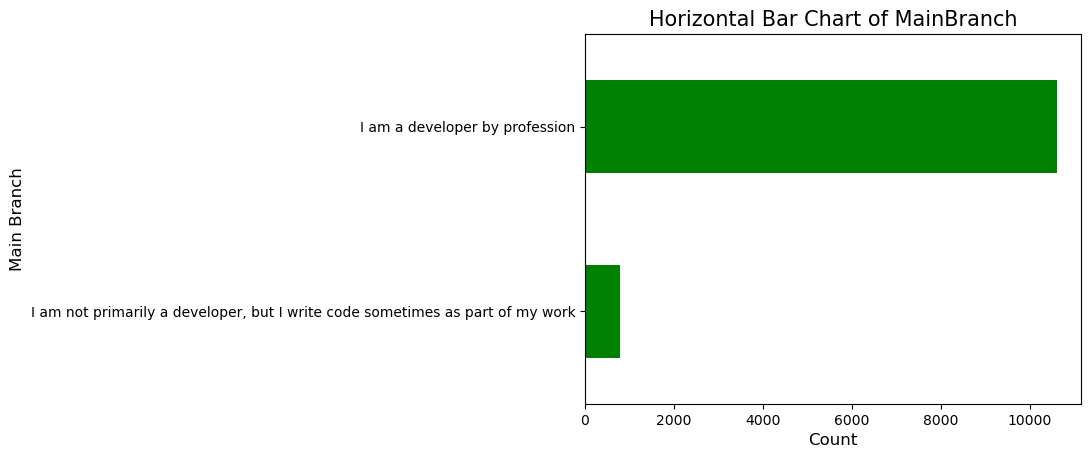

In [16]:
# your code goes here
# Loading the data for 'MainBranch'
df_bar = pd.read_sql_query("SELECT MainBranch, COUNT(*) as Count FROM master GROUP BY MainBranch", conn)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
df_bar.sort_values(by='Count', ascending=True).plot(kind='barh', x='MainBranch', y='Count', color='green', legend=False)
plt.title('Horizontal Bar Chart of MainBranch', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Main Branch', fontsize=12)
plt.show()




In [30]:
#coulumns in Master
# import sqlite3
import pandas as pd

# Reopen the connection
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to describe the table and see all columns
df_columns = pd.read_sql_query("PRAGMA table_info(master)", conn)

# Close the connection
conn.close()

# Convert to list and print all column names
column_names = df_columns['name'].tolist()
print(column_names)



['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents', 'SurveyLength', 'SurveyEase']


In [31]:
#datas in Respondent column
import sqlite3
import pandas as pd

# Reopen the connection
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to get data from the 'Respondent' column
df_respondent = pd.read_sql_query("SELECT Respondent FROM master", conn)

# Close the connection
conn.close()

# Display the data in the 'Respondent' column
print(df_respondent)


       Respondent
0               4
1               9
2              13
3              16
4              17
...           ...
11393       25136
11394       25137
11395       25138
11396       25141
11397       25142

[11398 rows x 1 columns]


In [45]:
#Databases
import sqlite3
import pandas as pd

# Reopen the connection
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to describe the table and see all columns
df_columns = pd.read_sql_query("PRAGMA table_info(master)", conn)

# Close the connection
conn.close()

# Convert to list and print all column names
column_names = df_columns['name'].tolist()
print("Column Names in 'master':", column_names)

# Replace 'DatabaseWorkedWith' with the actual column name you find
query_sql = """
SELECT COUNT(*) as RespondentCount
FROM master
WHERE LanguageWorkedWith LIKE '%SQL%'
"""




Column Names in 'master': ['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents', 'SurveyLength', 'SurveyEase']


In [49]:
#Rank of Python
import sqlite3
import pandas as pd

# Reopen the connection
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to get the languages respondents wish to learn next year
query_languages = """
SELECT LanguageDesireNextYear, COUNT(*) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC
"""

# Execute the query and fetch the result
df_languages = pd.read_sql_query(query_languages, conn)

# Close the connection
conn.close()

# Check the DataFrame
print(df_languages)

# Determine the rank of Python
if not df_languages.empty:
    # Add a rank column
    df_languages['Rank'] = df_languages['Count'].rank(method='min', ascending=False)
    
    # Find the rank of Python
    python_rank = df_languages[df_languages['LanguageDesireNextYear'] == 'Python']['Rank']
    
    if not python_rank.empty:
        print(f"The rank of Python is: {int(python_rank.values[0])}")
    else:
        print("Python is not in the list of desired languages.")
else:
    print("No data available for the specified query.")


   LanguageDesireNextYear  Count
0              JavaScript   6630
1                HTML/CSS   5328
2                  Python   5239
3                     SQL   5012
4              TypeScript   4088
5                      C#   3591
6   Bash/Shell/PowerShell   3097
7                    Java   2953
8                      Go   2759
9                  Kotlin   1890
10                    C++   1633
11                   Rust   1520
12                    PHP   1457
13            WebAssembly   1397
14                  Swift   1179
15                   Ruby   1029
16                      C   1028
17                  Scala    879
18                      R    850
19              Other(s):    836
20                     F#    621
21                 Elixir    620
22                   Dart    610
23                Clojure    413
24               Assembly    336
25            Objective-C    310
26                 Erlang    310
27                    VBA    149
The rank of Python is: 3


In [54]:
# How many respondents indicated that they work on 'MySQL' only? 
import sqlite3
import pandas as pd

# Reopen the connection
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to get the languages respondents wish to learn next year
query_languages = """
SELECT LanguageDesireNextYear, COUNT(*) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC
"""

# Execute the query and fetch the result
df_languages = pd.read_sql_query(query_languages, conn)

# Close the connection
conn.close()

# Check the DataFrame
print(df_languages)

# Determine the count of MySQL respondents
if not df_languages.empty:
    # Check for MySQL in the DataFrame
    mysql_count = df_languages[df_languages['LanguageDesireNextYear'] == 'MySQL']['Count']
    
    if not mysql_count.empty:
        print(f"The number of respondents who wish to learn MySQL is: {int(mysql_count.values[0])}")
    else:
        print("MySQL is not in the list of desired languages.")
else:
    print("No data available for the specified query.")




   LanguageDesireNextYear  Count
0              JavaScript   6630
1                HTML/CSS   5328
2                  Python   5239
3                     SQL   5012
4              TypeScript   4088
5                      C#   3591
6   Bash/Shell/PowerShell   3097
7                    Java   2953
8                      Go   2759
9                  Kotlin   1890
10                    C++   1633
11                   Rust   1520
12                    PHP   1457
13            WebAssembly   1397
14                  Swift   1179
15                   Ruby   1029
16                      C   1028
17                  Scala    879
18                      R    850
19              Other(s):    836
20                     F#    621
21                 Elixir    620
22                   Dart    610
23                Clojure    413
24               Assembly    336
25            Objective-C    310
26                 Erlang    310
27                    VBA    149
MySQL is not in the list of desired languag

Close the database connection.


In [17]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
